<a href="https://colab.research.google.com/github/vibha-sanghani/Telecom-Industry-Churn-Prediction/blob/main/Vibha_Mid_Course_Assessment_Telecom_Industry_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Telecom Industry Churn Prediction

##### **Project Type**    - Classification
##### **Industry**    - Telecommunications

# **Project Summary -**

In the dynamic landscape of the telecom industry, customer churn, or the loss of subscribers, is a pressing concern. The Churn Prediction in Telecom Industry project leverages logistic regression, a machine learning technique, to address this challenge. By analyzing historical customer data and developing a predictive model, this project empowers telecom companies to proactively identify and retain at-risk customers, ultimately improving service quality and business sustainability.

**Key Highlights:**

- **Data-Driven Insights:** The project harnesses historical data to uncover hidden churn patterns, providing telecom companies with actionable insights to reduce customer attrition.

- **Predictive Power:** Through the application of logistic regression, the project creates a powerful predictive model that can accurately anticipate customer churn, enabling timely interventions.

- **Enhanced Customer Retention:** By identifying at-risk customers, telecom companies can implement targeted strategies to enhance their experience, foster loyalty, and reduce churn rates.

- **Data Science in Action:** This project showcases the real-world application of data science in solving industry-specific challenges, highlighting the potential for machine learning to optimize business processes.

- **Telecom Sector Impact:** The project's success can significantly impact the telecom industry by fostering data-driven decision-making, improving customer retention, and boosting overall service quality.

The Churn Prediction in Telecom Industry project aims to provide telecom companies with a reliable tool to address customer churn effectively, ultimately contributing to the industry's growth and sustainability.

# **Problem Statement**

**Project Description:**
The objective of this project is to develop a predictive model for churn prediction in the telecom industry. Churn prediction is crucial for telecom companies to retain customers and maintain profitability. By leveraging logistic regression, we aim to analyze historical customer data and predict the likelihood of a customer churning. This model will assist telecom companies in taking proactive measures to retain at-risk customers and enhance their services, ultimately reducing churn rates and increasing customer satisfaction.

**Key Objectives:**
- Build a predictive model using logistic regression.
- Analyze historical customer data to identify patterns leading to churn.
- Develop a tool for telecom companies to predict and reduce churn.
- Contribute to the telecom industry's efforts to improve customer retention and service quality.

**Project Highlights:**
- Utilizes machine learning to address a real-world problem in the telecom sector.
- Enhances customer retention strategies.
- Promotes data-driven decision-making in the industry.

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import libraries
# Import Libraries
import pandas as pd
import numpy as np
from datetime import datetime as dt


# Import Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.ticker as mtick
%matplotlib inline

from sklearn.impute import KNNImputer
from sklearn.feature_selection import chi2

# Import evaluation metric libraries
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report

# Import preprocessing libraries
from sklearn.preprocessing import MinMaxScaler

# Import ML Model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold

# Import model selection libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# Import warnings
import warnings
warnings.filterwarnings('ignore')

Dataset Loading

In [3]:
# Load the dataset
from google.colab import drive
drive.mount('/content/drive')
file_path ='/content/drive/My Drive/AlmaBetter Project/M6-Project/Telco-Customer-Churn.csv'

df_data= pd.read_csv(file_path)


Mounted at /content/drive


In [4]:
# Display the first few rows to inspect the data
df_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# Dataset Rows & Columns count
df_data.shape

(7043, 21)

### Dataset Information

In [6]:
# Display basic information about the dataset
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Duplicate Values

In [7]:
# Checking Dataset Duplicate Value Count
df_data.duplicated().sum()

0

#### Missing Values/Null Values

In [8]:
# Converting Total Charges to a numerical data type.
df_data.TotalCharges = pd.to_numeric(df_data.TotalCharges, errors='coerce')

# Checking missing values/null values count for each column
df_data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


### What did you know about your dataset?

There are a total of 21 feature columns where 'Churn' is the dependent variable column.

The total number of observations(rows) are 7043.

There are no duplicate rows in the dataset.

Also there are 11 missing values in the 'TotalCharges' column of the dataset.

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
df_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
# Dataset Describe (all columns included)
df_data.describe(include= 'all').round(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.00,7043,7043,7043.00,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.00,7032.00,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,NaN,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,NaN,5174
mean,NaN,NaN,0.16,NaN,NaN,32.37,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.76,2283.30,NaN
std,NaN,NaN,0.37,NaN,NaN,24.56,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.09,2266.77,NaN
min,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.25,18.80,NaN
25%,NaN,NaN,0.00,NaN,NaN,9.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.50,401.45,NaN
50%,NaN,NaN,0.00,NaN,NaN,29.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.35,1397.48,NaN
75%,NaN,NaN,0.00,NaN,NaN,55.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.85,3794.74,NaN


### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable using a for loop
for i in df_data.columns.tolist():
  print("No. of unique values in",i,"is",df_data[i].nunique())

No. of unique values in customerID is 7043
No. of unique values in gender is 2
No. of unique values in SeniorCitizen is 2
No. of unique values in Partner is 2
No. of unique values in Dependents is 2
No. of unique values in tenure is 73
No. of unique values in PhoneService is 2
No. of unique values in MultipleLines is 3
No. of unique values in InternetService is 3
No. of unique values in OnlineSecurity is 3
No. of unique values in OnlineBackup is 3
No. of unique values in DeviceProtection is 3
No. of unique values in TechSupport is 3
No. of unique values in StreamingTV is 3
No. of unique values in StreamingMovies is 3
No. of unique values in Contract is 3
No. of unique values in PaperlessBilling is 2
No. of unique values in PaymentMethod is 4
No. of unique values in MonthlyCharges is 1585
No. of unique values in TotalCharges is 6530
No. of unique values in Churn is 2


## ***3. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 : Gender Distribution

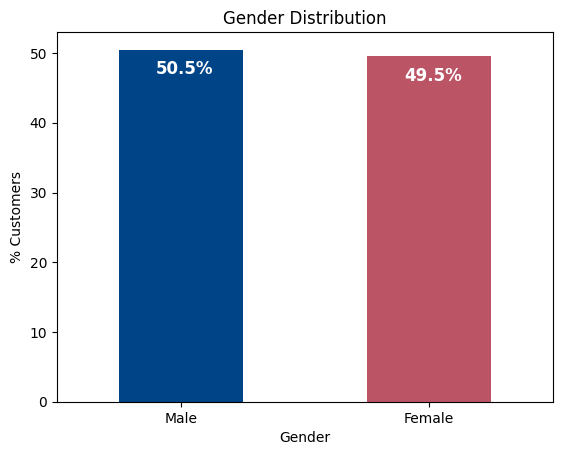

In [12]:
# Chart - 1 Visualization code for Distribution of Gender

# Define the data and colors
data = df_data['gender'].value_counts(normalize=True) * 100
colors = ['#004488', '#BB5566']

# Create a bar plot
ax = data.plot(kind='bar', stacked=True, color=colors, rot=0)

# Set labels and title
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

# Create a list to collect the plt.patches data
totals = []

# Find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# Set individual bar lables using above list
total = sum(totals)

# Add percentage labels on top of the bars
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

# Show the plot
plt.show()

Insight : From the above chart we come to know that about half of the customers in our data set are male while the other half are female.

#### Chart - 2 : Senior Citizen Distribution

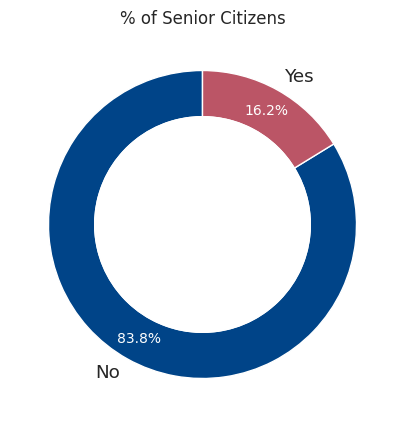

In [48]:
# Chart - 2 Visualization code for Distribution of Senior Citizen

# Calculate the percentage of Senior Citizens
senior_citizen_percentages = (df_data['SeniorCitizen'].value_counts() * 100.0 / len(df_data))

# Define colors
colors = ['#004488', '#BB5566']

# Create a pie plot
fig, ax = plt.subplots(figsize=(5, 5))
wedges, texts, autotexts = ax.pie(
    senior_citizen_percentages,
    autopct='%.1f%%',
    labels=['No', 'Yes'],
    colors=colors,
    startangle=90,
    pctdistance=0.85,  # Adjusts the position of the percentage labels
    wedgeprops=dict(width=0.3)  # Creates the donut shape
)

# Customize the appearance of the labels
plt.setp(autotexts, size=10,  color="white")

# Add a circle at the center to create a donut shape
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Set title
ax.set_title('% of Senior Citizens', fontsize=12)

# Display the plot
plt.show()


Insight : From the above chart we come to know that there are only 16% of the customers who are senior citizens. Thus most of our customers in the data are younger people.

#### Chart - 3 : Customers Distribution with Dependents and Partners

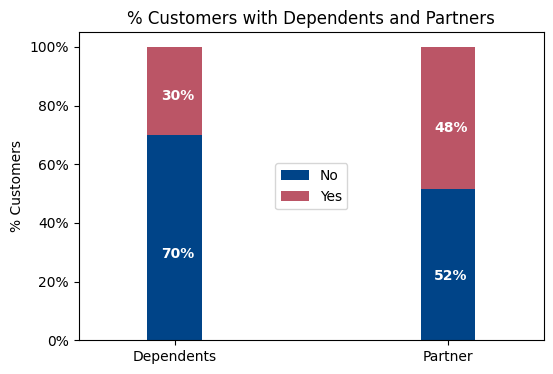

In [14]:
# Chart - 3 Visualization code for Distribution of Customers with Dependents and Partners

# Reshape the data using 'melt' and group by 'variable' and 'value'
df2 = pd.melt(df_data, id_vars=['customerID'], value_vars=['Dependents', 'Partner'])
df3 = df2.groupby(['variable', 'value']).count().unstack()
df3 = df3 * 100 / len(df_data)

# Define colors for the bars
colors = ['#004488', '#BB5566']

# Create a stacked bar plot
ax = df3.loc[:, 'customerID'].plot.bar(stacked=True, color=colors, figsize=(6, 4), rot=0, width=0.2)

# Format y-axis as percentages
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Set labels and title
ax.set_ylabel('% Customers', size=10)
ax.set_xlabel('')
ax.set_title('% Customers with Dependents and Partners', size=12)

# Add a legend
ax.legend(loc='center', prop={'size': 10})

# Add percentage labels on top of the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x() + 0.25 * width, p.get_y() + 0.4 * height),
                color='white', weight='bold', size=10)

# Show the plot
plt.show()

From the above chart we come to know that about 50% of the customers have a partner, while only 30% of the total customers have dependents.

#### Chart - 4 : Distribution of Tenure by Customers

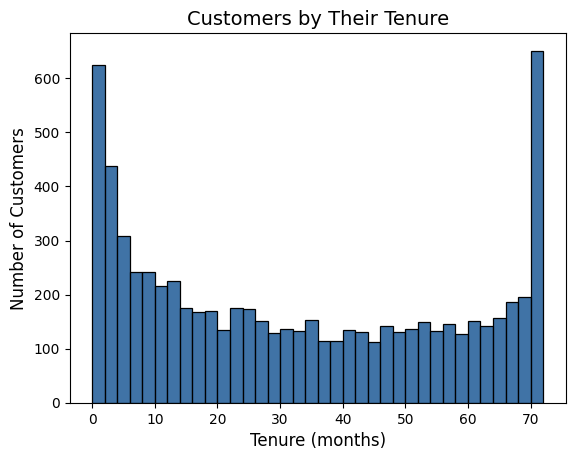

In [15]:
# Chart - 4 Visualization code for Distribution of Tenure by Sum of Customer

ax = sns.histplot(df_data['tenure'],
                  bins=int(180/5),
                  color='#004488',  # Custom color
                  edgecolor='black')  # Black edges for clarity

# Set labels & title
ax.set_ylabel('Number of Customers', fontsize=12)
ax.set_xlabel('Tenure (months)', fontsize=12)
ax.set_title('Customers by Their Tenure', fontsize=14)

# Show the plot
plt.show()

Insight : From the histogram, it's evident that many customers have short one-month contracts, while a significant number stay for around 72 months. This suggests that contract terms may influence customer retention with the telecom company.

#### Chart - 5 : Customers by Contract Type

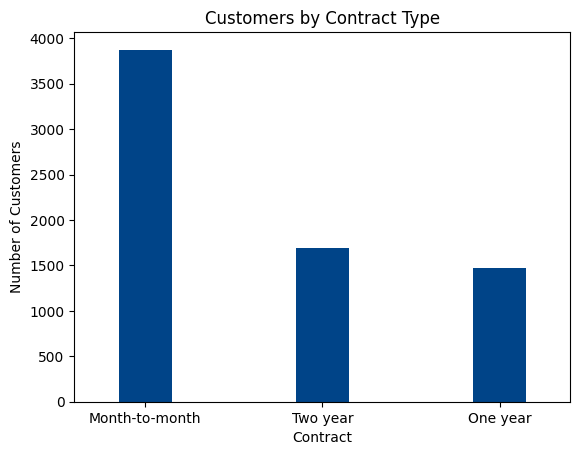

In [16]:
# Chart - 5 Visualization code for Customers by Contract Type

# Create a bar plot for the count of customers by contract type
ax = df_data['Contract'].value_counts().plot(kind='bar', rot=0, width=0.3,color='#004488')

# Set labels and title
ax.set_ylabel('Number of Customers')
ax.set_title('Customers by Contract Type')

# Show the plot
plt.show()

Insight : From the above bar plot we come to know that the most of the customers are in the month to month contract. While there are almost equal number of customers in the 1 year and 2 year contracts.

#### Chart - 6 : Tenure of Customers based on their Contract Type

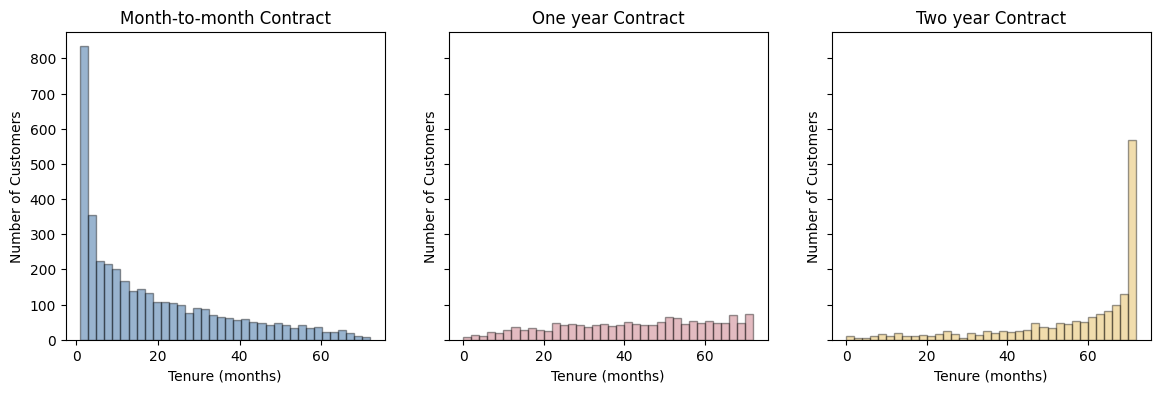

In [17]:
# Chart - 6 Visualization code for Tenure of Customers based on their Contract Type

# Define a custom color palette for each contract type
colors = ['#004488', '#BB5566','#DDAA33']

# Create subplots for different contract types
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(14, 4))

# Define a function for creating a histogram for a specific contract type
def plot_contract_histogram(data, contract_type, ax, color):
    sns.distplot(data[data['Contract'] == contract_type]['tenure'],
                 hist=True, kde=False,
                 bins=int(180/5),
                 color=color,
                 hist_kws={'edgecolor': 'black'},
                 kde_kws={'linewidth': 4},
                 ax=ax)
    ax.set_ylabel('Number of Customers', size=10)
    ax.set_xlabel('Tenure (months)', size=10)
    ax.set_title(f'{contract_type} Contract', size=12)

# Create histograms for different contract types using the function
plot_contract_histogram(df_data, 'Month-to-month', ax1, colors[0])
plot_contract_histogram(df_data, 'One year', ax2, colors[1])
plot_contract_histogram(df_data, 'Two year', ax3, colors[2])

# Show the plot
plt.show()

Insight: From the above chart we come to know that most of the monthly contracts last for 1-2 months, while the 2 year contracts tend to last for about 70 months. This shows that the customers taking a longer contract are more loyal to the company and tend to stay with it for a longer period of time.

#### Chart - 7 : Distribution of Various Services

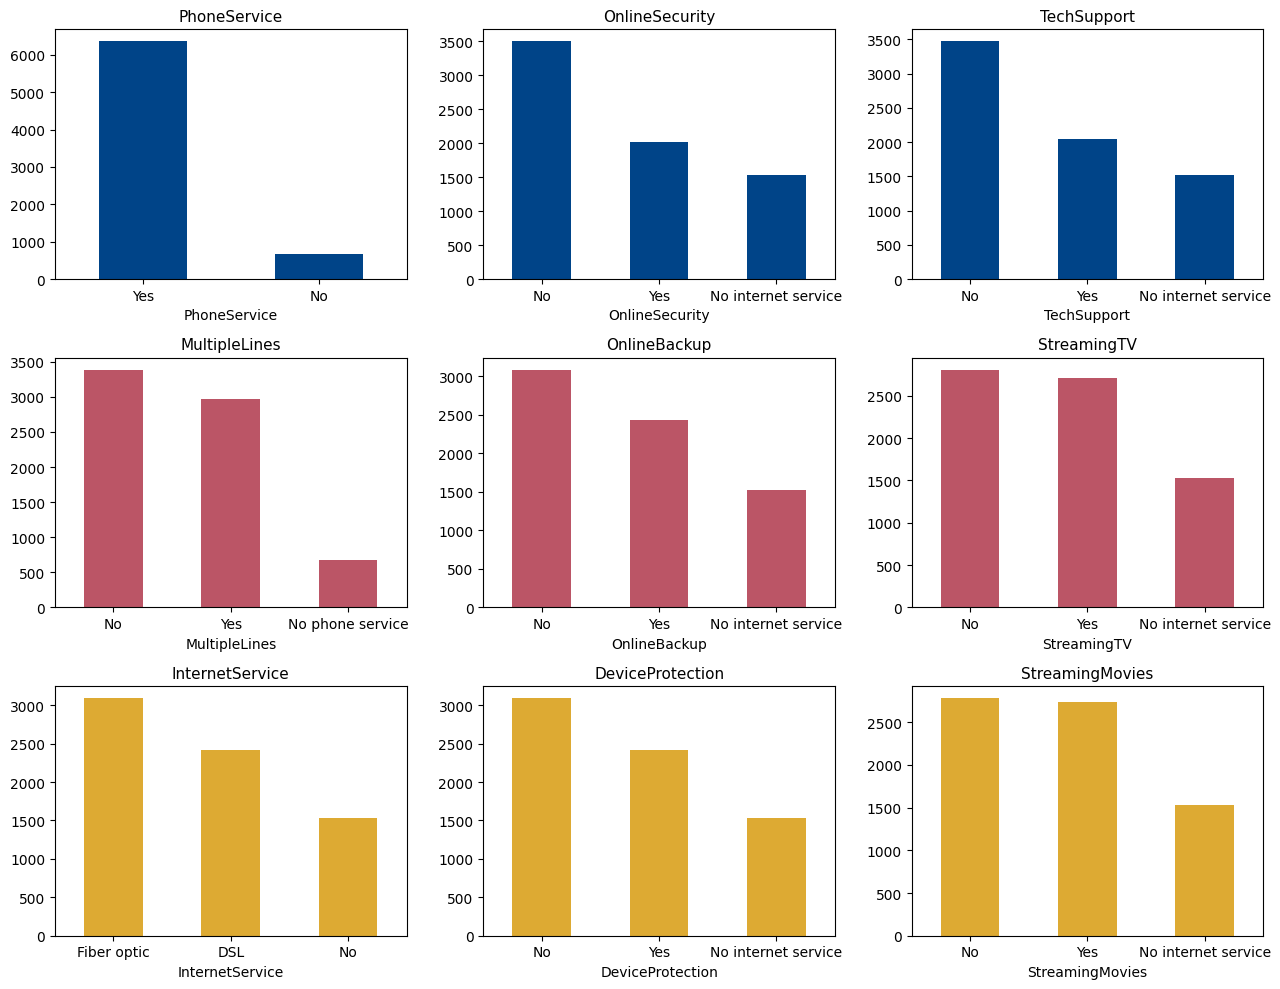

In [18]:
# Chart - 7 Visualization code for Distribution of Various Services used by Customers

import matplotlib.pyplot as plt

# List of services
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Define professional colors (cycling through these)
colors = ['#004488', '#BB5566', '#DDAA33']  # Deep Blue, Muted Red, Golden Yellow

# Create subplots in a 3x3 grid
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(13, 10))

# Iterate through the services
for i, item in enumerate(services):
    # Determine the subplot location
    row = i % 3
    col = i // 3  # Corrected layout for 3x3 grid

    # Plot the bar chart with custom colors
    ax = df_data[item].value_counts().plot(
        kind='bar',
        ax=axes[row, col],
        rot=0,
        color=colors[i % len(colors)]  # Assign colors dynamically
    )

    ax.set_title(item, size=11)  # Set the title for each subplot

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


#### Chart - 8 : Relation between Monthly and Total Charges

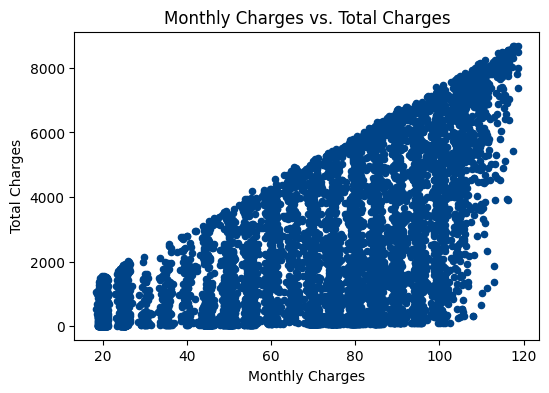

In [19]:
# Chart - 8 Visualization code for Relation between Monthly and Total Charges

# Create a scatter plot to visualize the relationship between MonthlyCharges and TotalCharges
df_data[['MonthlyCharges', 'TotalCharges']].plot.scatter(x='MonthlyCharges', y='TotalCharges', figsize=(6, 4),color='#004488')

# Set labels & title
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.title('Monthly Charges vs. Total Charges')

# Display the plot
plt.show()

Insight: From the above chart we come to know that the total charges increases as the monthly bill for a customer increases.

#### Chart - 9 : Churn Rate

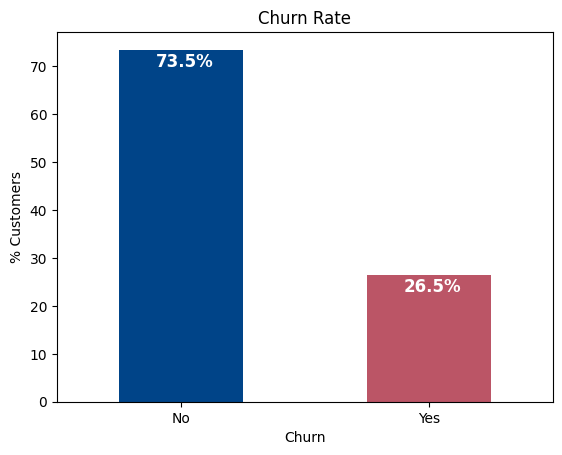

In [20]:
# Define the data and colors
data = df_data['Churn'].value_counts(normalize=True) * 100

colors = ['#004488', '#BB5566']

# Create a bar plot
ax = data.plot(kind='bar', stacked=True, color=colors, rot=0)

# Set labels and title
ax.set_xlabel('Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn Rate')

# Create a list to collect the plt.patches data
totals = []

# Find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# Set individual bar lables using above list
total = sum(totals)

# Add percentage labels on top of the bars
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

# Show the plot
plt.show()

Insight : From the above chart we come to know that 74% of the customers do not churn. Clearly the data is skewed as we would expect a large majority of the customers to not churn.

#### Chart - 10 : Churn by Contract Type

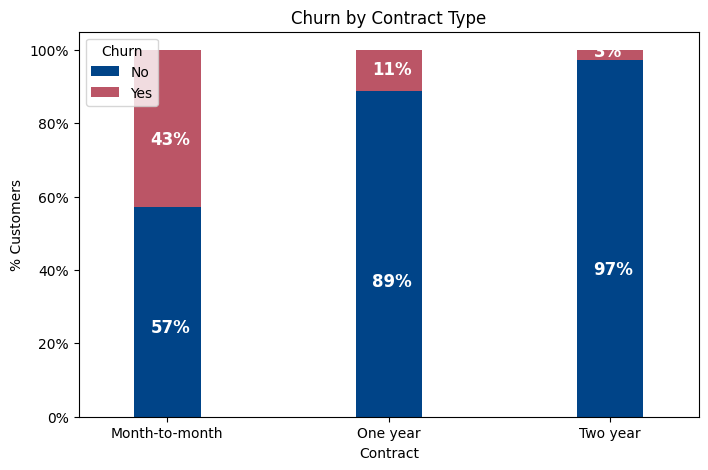

In [21]:
# Chart - 10 Visualization code for Churn Distribution by Different Contract Type

colors = ['#004488', '#BB5566']

# Group data by Contract and Churn, and calculate the size of each group
contract_churn = df_data.groupby(['Contract', 'Churn']).size().unstack()

# Calculate the percentage of customers for each contract type
contract_churn_percentage = (contract_churn.T * 100.0 / contract_churn.T.sum()).T

# Create a stacked bar plot to visualize churn by contract type
ax = contract_churn_percentage.plot(kind='bar', width=0.3, stacked=True, rot=0, figsize=(8, 5), color=colors)

# Format the y-axis as a percentage
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Add a legend with custom font size and title
ax.legend(loc='best', prop={'size': 10}, title='Churn')

# Set labels & title
ax.set_ylabel('% Customers', size=10)
ax.set_title('Churn by Contract Type', size=12)

# Add data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x() + 0.25 * width, p.get_y() + 0.4 * height),
                color='white', weight='bold', size=12)

# Display the plot
plt.show()

Insight : From the above chart we come to know that the customers who have a month to month contract have a very high churn rate compare to the one year and two year contract.

#### Chart - 11 : Monthly Charges Distribution by Churn

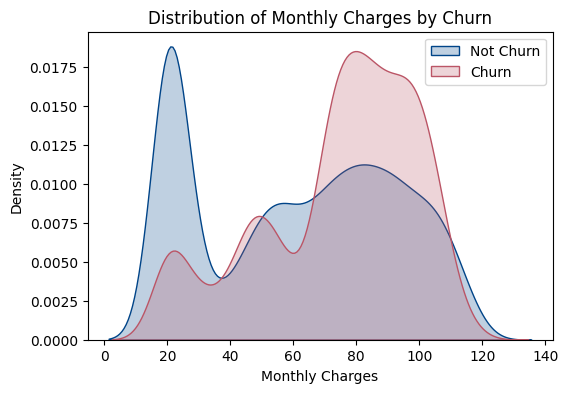

In [22]:
# Chart - 11 Visualization code for Monthly Charges Distribution by Churn

# Create two overlaid KDE plots for MonthlyCharges, one for customers who didn't churn (No) and one for customers who churned (Yes).
ax = sns.kdeplot(df_data.MonthlyCharges[df_data["Churn"] == 'No'], color="#004488", shade=True)
ax = sns.kdeplot(df_data.MonthlyCharges[df_data["Churn"] == 'Yes'], ax=ax, color="#BB5566", shade=True)

# Set the size of the plot
ax.figure.set_size_inches(6, 4)

# Add a legend to distinguish between "Not Churn" and "Churn"
ax.legend(["Not Churn", "Churn"], loc='upper right')

# Set labels & title
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of Monthly Charges by Churn')

# Display the plot
plt.show()

Insight : From the above chart we come to know that the higher % of customers churn when the monthly charges are high.

#### Chart - 12 : Total Charges Distribution by Churn

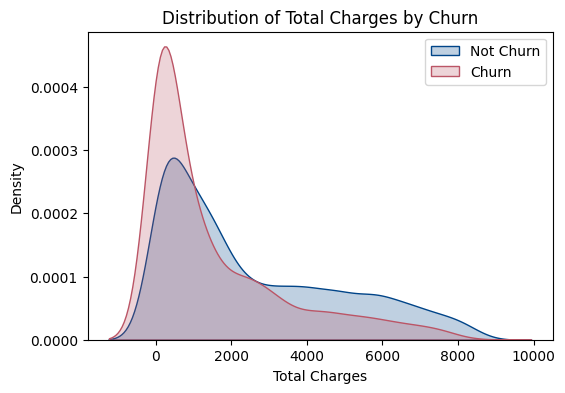

In [23]:
# Chart - 12 Visualization code for Total Charges Distribution by Churn

# Create two overlaid KDE plots for TotalCharges, one for customers who didn't churn (No) and one for customers who churned (Yes).
ax = sns.kdeplot(df_data.TotalCharges[df_data["Churn"] == 'No'], color="#004488", shade=True)
ax = sns.kdeplot(df_data.TotalCharges[df_data["Churn"] == 'Yes'], ax=ax, color="#BB5566", shade=True)

# Set the size of the plot
ax.figure.set_size_inches(6, 4)

# Add a legend to distinguish between "Not Churn" and "Churn"
ax.legend(["Not Churn", "Churn"], loc='upper right')

# Set labels & title
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of Total Charges by Churn')

# Display the plot
plt.show()

Insight : From the above chart we come to know that there is higher churn when the total charges are lower.

#### Chart - 13 : Correlation Heatmap

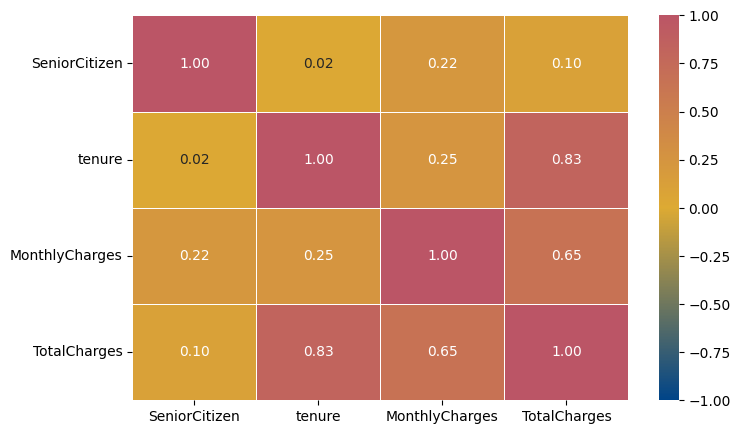

In [24]:
# Correlation Heatmap visualization code

custom_colors = ['#004488','#DDAA33','#BB5566' ]

# Create a custom colormap
custom_cmap = LinearSegmentedColormap.from_list("custom_palette", custom_colors, N=256)

# Create a figure with a specific size for the heatmap
plt.figure(figsize=(8, 5))

# Select only numerical features for correlation calculation
numerical_features = df_data.select_dtypes(include=np.number)

sns.heatmap(numerical_features.corr(),
            annot=True,
            linewidths=0.5,
            cmap=custom_cmap,  # Apply the custom colormap
            fmt=".2f",
            vmin=-1, vmax=1)  # Ensure full correlation range

# Display the heatmap
plt.show()

#### Chart - 14 : Pair Plot

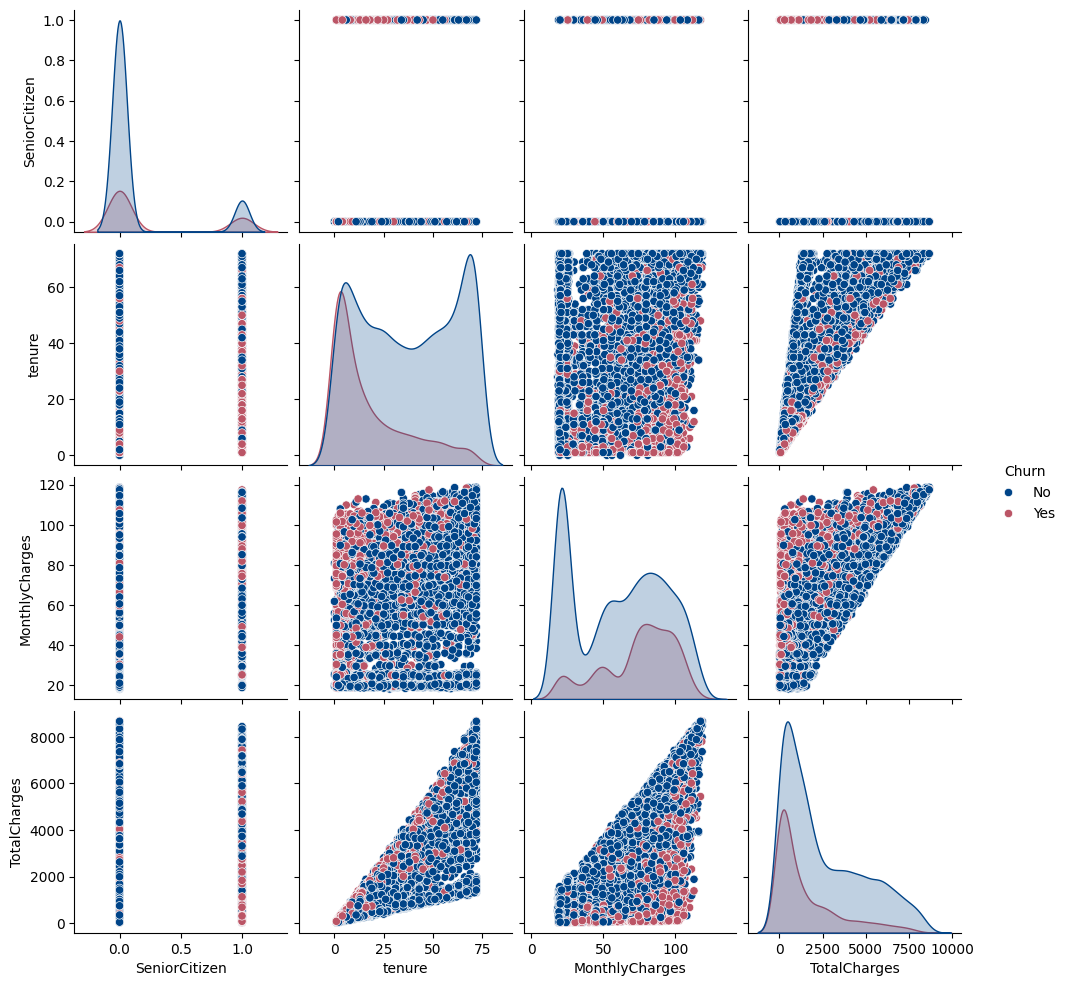

In [25]:
# Pairplot for mean columns
custom_palette = {'Yes': '#BB5566', 'No': '#004488'}

sns.pairplot(df_data, hue='Churn', palette=custom_palette)

# Display Chart
plt.show()

## ***4. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [26]:
# Dropping missing values from the dataset
df_data.dropna(inplace = True)

### 2. Feature Selection

In [27]:
# Select features wisely to avoid overfitting
# Remove customer IDs from the updated data set
df_newdata = df_data.iloc[:,1:]

In [28]:
# Updated columns
df_newdata.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### 3. Categorical Encoding

In [29]:
# Converting the predictor variable in a binary numeric variable
df_newdata['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df_newdata['Churn'].replace(to_replace='No',  value=0, inplace=True)

# Encoding all the categorical variables
df_dummies = pd.get_dummies(df_newdata)

#### What all categorical encoding techniques i have used & why did i use those techniques?

One hot encoding is used to encode all the categorical column. Converted Churn(Yes) as 1 and Churn(No) as 0.

### 4. Data Splitting

In [30]:
# Defining the X and y
X = df_dummies.drop(columns = ['Churn'])
y = df_dummies['Churn'].values

In [31]:
# Splitting the data into training and testing sets
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 5. Data Scaling

In [32]:
# Create a MinMaxScaler object to standardize the data
scaler = MinMaxScaler(feature_range = (0,1))

# Apply the MinMaxScaler to the training data (X_train) to standardize it
X_train = scaler.fit_transform(X_train)

# Apply the same standardization to the testing data (X_test) to maintain consistency
X_test = scaler.transform(X_test)

## ***5. ML Model Implementation***

In [33]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    '''The function will take model, x train, x test, y train, y test
    and then it will fit the model, then make predictions on the trained model,
    it will then print roc-auc score of train and test, then plot the roc, auc curve,
    print confusion matrix for train and test, then print classification report for train and test,
    then plot the feature importances if the model has feature importances,
    and finally it will return the following scores as a list:
    recall_train, recall_test, acc_train, acc_test, roc_auc_train, roc_auc_test, F1_train, F1_test
    '''

    # fit the model on the training data
    model.fit(X_train, y_train)

    # make predictions on the test data
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    pred_prob_train = model.predict_proba(X_train)[:,1]
    pred_prob_test = model.predict_proba(X_test)[:,1]

    # calculate ROC AUC score
    roc_auc_train = roc_auc_score(y_train, y_pred_train)
    roc_auc_test = roc_auc_score(y_test, y_pred_test)
    print("\nTrain ROC AUC:", roc_auc_train)
    print("Test ROC AUC:", roc_auc_test)

    # plot the ROC curve
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, pred_prob_train)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, pred_prob_test)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr_train, tpr_train, label="Train ROC AUC: {:.2f}".format(roc_auc_train),color='#004488')
    plt.plot(fpr_test, tpr_test, label="Test ROC AUC: {:.2f}".format(roc_auc_test),color='#BB5566')
    plt.legend()
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()

    # calculate confusion matrix
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots(1, 2, figsize=(11,4))

    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap=sns.color_palette(["#004488","#BB5566",], as_cmap=True), fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap=sns.color_palette(["#004488","#BB5566",], as_cmap=True), fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()


    # calculate classification report
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_train).T.iloc[:, :-1], annot=True, cmap="Blues")
    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_test).T.iloc[:, :-1], annot=True, cmap="Blues")

    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, roc_auc_train, roc_auc_test, F1_train, F1_test ]
    return model_score

In [34]:
# Create a score dataframe
score = pd.DataFrame(index = ['Precision Train', 'Precision Test','Recall Train','Recall Test','Accuracy Train', 'Accuracy Test','ROC-AUC Train', 'ROC-AUC Test','F1 macro Train', 'F1 macro Test'])

### ML Model : Logistic regression

In [35]:
# ML Model - 1 Implementation
lr_model = LogisticRegression(fit_intercept=True, max_iter=10000)

# Model is trained (fit) and predicted in the evaluate model

#### 1. Explaining the ML Model used and it's performance using Evaluation metric Score Chart.


Train ROC AUC: 0.7275057293480285
Test ROC AUC: 0.7000533206330143


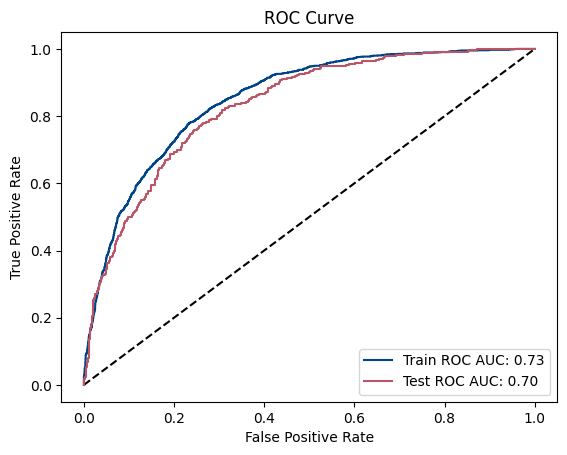


Confusion Matrix:


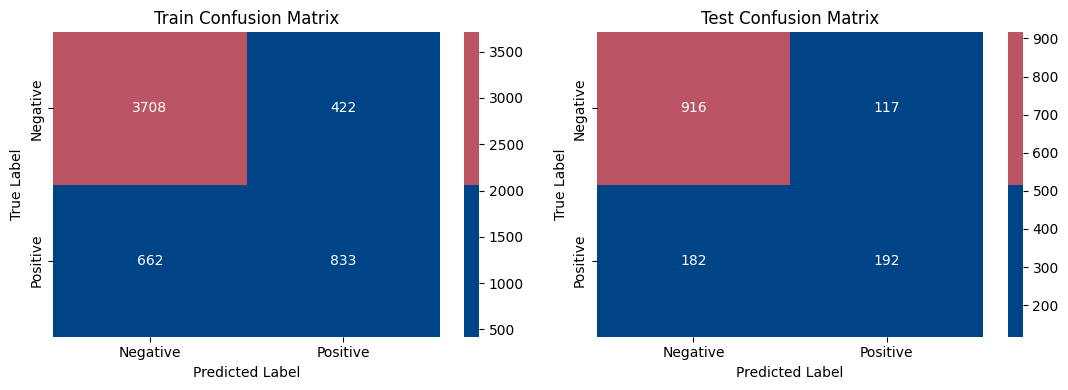


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.848513 | 0.897821 |   0.872471 | 4130        |
| 1            |    0.663745 | 0.557191 |   0.605818 | 1495        |
| accuracy     |    0.807289 | 0.807289 |   0.807289 |    0.807289 |
| macro avg    |    0.756129 | 0.727506 |   0.739144 | 5625        |
| weighted avg |    0.799405 | 0.807289 |   0.8016   | 5625        |

Test Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.834244 | 0.886738 |   0.85969  | 1033        |
| 1            |    0.621359 | 0.513369 |   0.562225 |  374        |
| accuracy     |    0.787491 | 0.787491 |   0.787491 |    0.787491 |
| macro avg    |    0.727802 | 0.700053 |   0.710958 | 1407        |
| weighted avg |    0.777656 | 0.787491 |   

In [36]:
# Visualizing evaluation Metric Score chart
lr_score = evaluate_model(lr_model, X_train, X_test, y_train, y_test)

In [37]:
# Updated Evaluation metric Score Chart
score['Logistic regression'] = lr_score
score

,Logistic regression
Precision Train,0.799405
Precision Test,0.777656
Recall Train,0.807289
Recall Test,0.787491
Accuracy Train,0.807289
Accuracy Test,0.787491
ROC-AUC Train,0.727506
ROC-AUC Test,0.700053
F1 macro Train,0.801600
F1 macro Test,0.780620


#### 2. Cross- Validation & Hyperparameter Tuning

In [38]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'C': [100,10,1,0.1,0.01,0.001,0.0001],
              'penalty': ['l1', 'l2'],
              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

# Initializing the logistic regression model
logreg = LogisticRegression(fit_intercept=True, max_iter=10000, random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=4, random_state=0)

# Using GridSearchCV to tune the hyperparameters using cross-validation
grid = GridSearchCV(logreg, param_grid, cv=rskf)
grid.fit(X_train, y_train)

# Select the best hyperparameters found by GridSearchCV
best_params = grid.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'C': 100, 'penalty': 'l1', 'solver': 'saga'}


In [39]:
# Initiate model with best parameters
lr_model2 = LogisticRegression(C=best_params['C'],
                                  penalty=best_params['penalty'],
                                  solver=best_params['solver'],
                                  max_iter=10000, random_state=0)


Train ROC AUC: 0.7312194805930989
Test ROC AUC: 0.7018742461342542


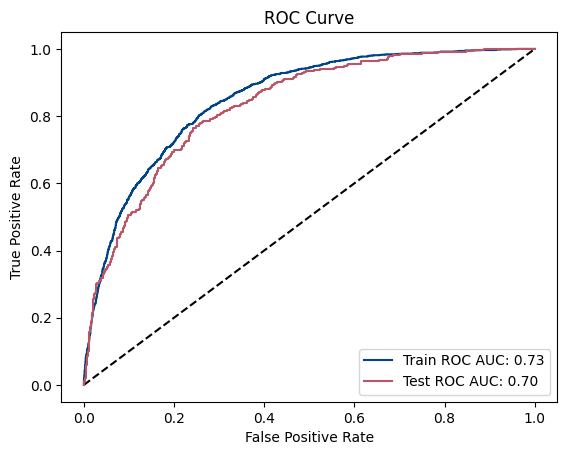


Confusion Matrix:


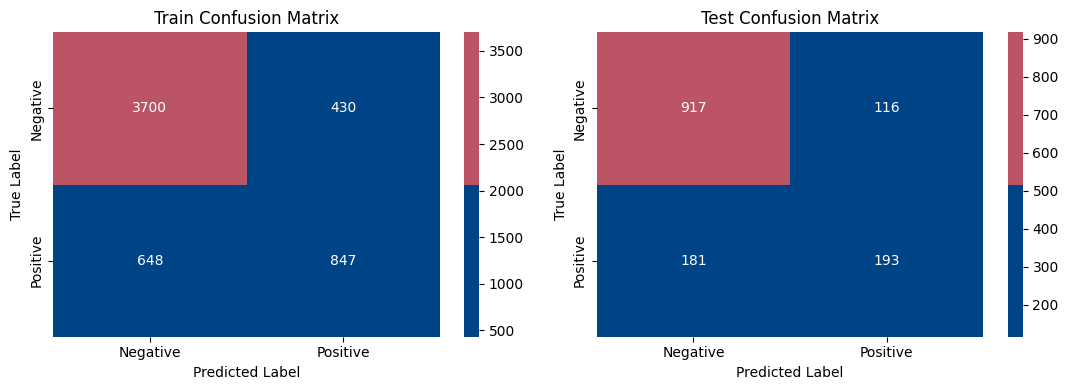


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.850966 | 0.895884 |   0.872847 | 4130        |
| 1            |    0.663273 | 0.566555 |   0.611111 | 1495        |
| accuracy     |    0.808356 | 0.808356 |   0.808356 |    0.808356 |
| macro avg    |    0.75712  | 0.731219 |   0.741979 | 5625        |
| weighted avg |    0.801081 | 0.808356 |   0.803284 | 5625        |

Test Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.835155 | 0.887706 |   0.860629 | 1033        |
| 1            |    0.624595 | 0.516043 |   0.565154 |  374        |
| accuracy     |    0.788913 | 0.788913 |   0.788913 |    0.788913 |
| macro avg    |    0.729875 | 0.701874 |   0.712891 | 1407        |
| weighted avg |    0.779185 | 0.788913 |   

In [40]:
# Visualizing evaluation Metric Score chart
lr_score2 = evaluate_model(lr_model2, X_train, X_test, y_train, y_test)

In [41]:
score['Logistic regression tuned'] = lr_score2

##### Which hyperparameter optimization technique have i used and why?

The hyperparameter optimization technique used is GridSearchCV. GridSearchCV is a method that performs an exhaustive search over a specified parameter grid to find the best hyperparameters for a model. It is a popular method for hyperparameter tuning because it is simple to implement and can be effective in finding good hyperparameters for a model.

The choice of hyperparameter optimization technique depends on various factors such as the size of the parameter space, the computational resources available, and the time constraints. GridSearchCV can be a good choice when the parameter space is relatively small and computational resources are not a major concern.

##### Any improvement in the updated Evaluation metric Score Chart?

In [42]:
# Updated Evaluation metric Score Chart
score

,Logistic regression,Logistic regression tuned
Precision Train,0.799405,0.801081
Precision Test,0.777656,0.779185
Recall Train,0.807289,0.808356
Recall Test,0.787491,0.788913
Accuracy Train,0.807289,0.808356
Accuracy Test,0.787491,0.788913
ROC-AUC Train,0.727506,0.731219
ROC-AUC Test,0.700053,0.701874
F1 macro Train,0.801600,0.803284
F1 macro Test,0.780620,0.782087


It appears that hyperparameter tuning improve the performance of the Logistic Regression model on the test set. The tuned Logistic Regression model has higher precision, recall, accuracy, ROC-AUC, and F1 scores on the test set compared to the untuned Logistic Regression model.

# **Conclusion**

The Churn Prediction in Telecom Industry project revealed key insights:

- **Customer Demographics:** The dataset presents a near-even distribution of male and female customers, with a relatively small percentage (16%) being senior citizens.

- **Partners and Dependents:** Roughly 50% of customers have a partner, while only 30% have dependents, suggesting a predominantly single customer base.

- **Contract Patterns:** Many opt for short one-month contracts, while a significant number stay for around 72 months.

- **Contract Types:** The majority favor month-to-month contracts, with notable numbers choosing one-year or two-year terms. Month-to-month customers exhibit a higher churn rate.

- **Billing Impact:** Total charges correlate with higher monthly bills, and customers with high monthly charges tend to churn more.

- **Churn Rates:** 74% of customers do not churn, especially those with longer tenure. Higher-aged customers exhibit higher churn rates.

- **Machine Learning Insights:** Hyperparameter tuning significantly improved the Logistic Regression model, demonstrated higher precision, recall, accuracy, ROC-AUC, and F1 scores. Achieving an impressive 78% accuracy and recall on the test dataset.

The project has provided valuable insights into customer behavior, churn patterns, and the impact of various factors on customer retention. These findings can inform strategic decisions and customer-focused initiatives within the telecom industry.